<a href="https://colab.research.google.com/github/sensewake/Colab.ipynb/blob/main/Colab3%EC%A3%BC%EC%B0%A8_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
sparta_data = pd.read_table('/content/students_area_detail.csv',sep=',')
sparta_data.head()

,lecture_id,area,latitude,longitude,user_id
0,5f2cfa581c0c783e4e825379,부산,35.179554,129.075642,78ff837c7cea9f33
1,5f35370cf9b9ed3dee7f1b73,대전,36.348315,127.390594,2987aa87d23c9e3d
2,5f266927e67b8fcf4340c1464,서울,37.487935,126.857758,23182525e9996864
3,5f35370cf9b9ed3dee7f1b6a,부산,35.179554,129.075642,ffb6913842d617a5
4,5f266927e67b8fcf4340c1705,서울,37.487935,126.857758,2c6822e7e833dc95


In [ ]:
# set 중복데이터 삭제해 준다.
category_range = set(sparta_data['area']) 
print(category_range, len(category_range))

{'서울', '경남', '강원', '부산', '충북', '광주', '대전', '제주', '경기', '경북', '전북', '세종'} 12


In [ ]:
sparta_data = pd.read_table('/content/students_area_detail.csv',sep=',')
sparta_data.head()

#새로운 테이블을 만들고자 할 땐 기존의 테이블에서 필요한 "열의 이름"을 대괄호에 넣어 변수에 지정해 주면 됩니다 
area_info=sparta_data[['area','latitude','longitude']]
#잘 만들어졌는지 초기 5개의 데이터 확인하기 
area_info.head()

,area,latitude,longitude
0,부산,35.179554,129.075642
1,대전,36.348315,127.390594
2,서울,37.487935,126.857758
3,부산,35.179554,129.075642
4,서울,37.487935,126.857758


In [ ]:
#drop_duplicates()을 이용하면, area(지역) 컬럼의 중복 데이터를 처리 할 수 있습니다. :) 
area_info=area_info.drop_duplicates(['area'])
area_info

,area,latitude,longitude
0,부산,35.179554,129.075642
1,대전,36.348315,127.390594
2,서울,37.487935,126.857758
5,전북,35.574683,126.852264
11,광주,36.084621,126.951141
13,경기,37.546755,127.203827
36,강원,37.531510,129.000000
41,세종,36.560000,127.278000
53,경북,36.129002,128.343658
59,경남,35.556809,129.247284


In [ ]:
#.reset_index()를 이용해, 인덱스를 재정렬 할 수 있어요! 
area_info= area_info.reset_index()
area_info

,index,area,latitude,longitude
0,0,부산,35.179554,129.075642
1,1,대전,36.348315,127.390594
2,2,서울,37.487935,126.857758
3,5,전북,35.574683,126.852264
4,11,광주,36.084621,126.951141
5,13,경기,37.546755,127.203827
6,36,강원,37.531510,129.000000
7,41,세종,36.560000,127.278000
8,53,경북,36.129002,128.343658
9,59,경남,35.556809,129.247284


In [ ]:
area_info = area_info.sort_values(by=["area"], ascending=[True]) 
area_info= area_info.reset_index()
area_info

,level_0,index,area,latitude,longitude
0,6,36,강원,37.531510,129.000000
1,5,13,경기,37.546755,127.203827
2,9,59,경남,35.556809,129.247284
3,8,53,경북,36.129002,128.343658
4,4,11,광주,36.084621,126.951141
5,1,1,대전,36.348315,127.390594
6,0,0,부산,35.179554,129.075642
7,2,2,서울,37.487935,126.857758
8,7,41,세종,36.560000,127.278000
9,3,5,전북,35.574683,126.852264


In [ ]:
number_of_students = pd.DataFrame(sparta_data.groupby('area')['user_id'].count()) 
number_of_students

,user_id
area,
강원,261
경기,804
경남,79
경북,85
광주,565
대전,1238
부산,1162
서울,5296
세종,446


In [ ]:
#merge()를 이용하여, 두 테이블을 병합 할수 있어요 :)!
# area_info, number_of_students 각각을 두한 후 merge 한다.
result = pd.merge(area_info, number_of_students, on="area") 
result

,level_0,index,area,latitude,longitude,user_id
0,6,36,강원,37.531510,129.000000,261
1,5,13,경기,37.546755,127.203827,804
2,9,59,경남,35.556809,129.247284,79
3,8,53,경북,36.129002,128.343658,85
4,4,11,광주,36.084621,126.951141,565
5,1,1,대전,36.348315,127.390594,1238
6,0,0,부산,35.179554,129.075642,1162
7,2,2,서울,37.487935,126.857758,5296
8,7,41,세종,36.560000,127.278000,446
9,3,5,전북,35.574683,126.852264,160


In [ ]:
# 분석 및 시각화 
# 한글깨짐 해결 : 아래 주석 3줄을 실행 후 런타임 재실행을 한 후 코드 재실행을 하면 한글이 적용된다.
# 새로운 런타임 때 마다 실행 한다.

In [ ]:
"""
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
"""

'\n!sudo apt-get install -y fonts-nanum\n!sudo fc-cache -fv\n!rm ~/.cache/matplotlib -rf\n'

In [ ]:
#한글 깨짐을 방지
import matplotlib.pyplot as plt 
import numpy as np
plt.rc('font', family='NanumBarunGothic') #한글 깨짐을 방지시켜줘요!

In [ ]:
# (2) 지역별 수강생 수 라인 그래프 그리기

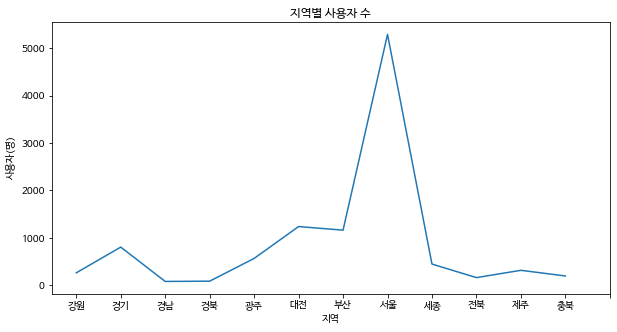

In [ ]:
#그래프 사이즈 변경
plt.figure(figsize=(10,5)) 
#그래프 x축 y축
plt.plot(result['area'], result['user_id']) 
#그래프 명
plt.title('지역별 사용자 수') 
#그래프 x축 레이블
plt.xlabel('지역')
#그래프 y축 레이블
plt.ylabel('사용자(명)') 
#x축 눈금 수
plt.xticks(np.arange(13)) 
#그래프 출력
plt.show()

In [ ]:
# 필요한 라이브러리 사용 선언하기 
import folium
from folium.plugins import MarkerCluster

In [ ]:
# 대한민국 위치 , zoom 11 8
m = folium.Map(location=[37.5536067,126.9674308],
zoom_start=8)
m

In [ ]:
fruits = ['사과', '배', '배', '감', '수박', '귤', '딸기', '사과', '배', '수박'] 
count = 0
# 들여쓰기가 중요함
for fruit in fruits:
    if fruit == '사과':
        count = count + 1

# 사과의 갯수를 출력합니다. 
print(count)

2


In [ ]:
for n in result.index:
    radius = result.loc[n,'user_id']
    #loc[n,"열 이름"] => loc[]를 활용하여 n번째의 열을 조회 할수 있습니다! 
    #즉, n번째의 user의 수를 가져 올수 있는 것이죠!
    folium.CircleMarker([result['latitude'][n],result['longitude'][n]],
    radius = radius/50, fill=True).add_to(m)
    #.add_to(m)를 활용하여, 지정해 두었던 우리나라의 지도를 가져올 수 있습니다! 
m

In [ ]:
'''
# 3주차 과제
done_detail.csv   : https://s3.ap-northeast-2.amazonaws.com/materials.spartacodingclub.kr/data/week3/done_detail.csv

(1) Pandas 라이브러리 및 데이터 불러오기
(2) 시간 데이터 전처리 해주기
(3) 요일 추가하기
(4) 요일 별 수강완료 수강생 수 전처리 하기

'''

'\n# 3주차 과제\ndone_detail.csv   : https://s3.ap-northeast-2.amazonaws.com/materials.spartacodingclub.kr/data/week3/done_detail.csv\n\n\n'

In [ ]:
# (1) Pandas 라이브러리 및 데이터 불러오기

In [ ]:
#Pandas 사용 선언하기 
import pandas as pd
#데이터 불러오기
sparta_data = pd.read_table('/content/done_detail.csv',sep=',') 
#데이터 확인하기
sparta_data.tail(5)

,lecture_id,done_date,user_id
8123,5f2786faa76ce73f7c0a949b,2020-08-06 0:06:13,6da398d852411234
8124,5f36558829f38171335a88fc,2020-08-30 0:17:10,6da398d852411235
8125,5f2786faa76ce73f7c0a9498,2020-08-15 23:11:47,6da398d852411236
8126,5f2786faa76ce73f7c0a9495,2020-08-15 21:35:33,6da398d852411237
8127,5f266927e67b8fcf4340c08b,2020-08-18 18:12:39,6da398d852411238


In [ ]:
sparta_data.head()

,lecture_id,done_date,user_id
0,5f266927e67b8fcf4340c08e,2020-08-07 12:02:16,78ff837c7cea9f33
1,5f266927e67b8fcf4340c08b,2020-08-08 1:14:59,2987aa87d23c9e3d
2,5f266927e67b8fcf4340c090,2020-08-17 17:10:49,23182525e9996864
3,5f35370cf9b9ed3dee7f1b72,2020-08-30 23:42:58,ffb6913842d617a5
4,5f35370cf9b9ed3dee7f1b6e,2020-08-25 16:56:15,2c6822e7e833dc95


In [ ]:
#(2) 시간 데이터 전처리 해주기
format='%Y-%m-%dT%H:%M:%S.%f'
sparta_data['done_date_time'] = pd.to_datetime(sparta_data['done_date'], format=format) 
sparta_data.tail(5)

,lecture_id,done_date,user_id,done_date_time
8123,5f2786faa76ce73f7c0a949b,2020-08-06 0:06:13,6da398d852411234,2020-08-06 00:06:13
8124,5f36558829f38171335a88fc,2020-08-30 0:17:10,6da398d852411235,2020-08-30 00:17:10
8125,5f2786faa76ce73f7c0a9498,2020-08-15 23:11:47,6da398d852411236,2020-08-15 23:11:47
8126,5f2786faa76ce73f7c0a9495,2020-08-15 21:35:33,6da398d852411237,2020-08-15 21:35:33
8127,5f266927e67b8fcf4340c08b,2020-08-18 18:12:39,6da398d852411238,2020-08-18 18:12:39


In [ ]:
#(3) 요일 추가하기
sparta_data['done_date_time_weekday'] = sparta_data['done_date_time'].dt.day_name() 
sparta_data.tail(5)

,lecture_id,done_date,user_id,done_date_time,done_date_time_weekday
8123,5f2786faa76ce73f7c0a949b,2020-08-06 0:06:13,6da398d852411234,2020-08-06 00:06:13,Thursday
8124,5f36558829f38171335a88fc,2020-08-30 0:17:10,6da398d852411235,2020-08-30 00:17:10,Sunday
8125,5f2786faa76ce73f7c0a9498,2020-08-15 23:11:47,6da398d852411236,2020-08-15 23:11:47,Saturday
8126,5f2786faa76ce73f7c0a9495,2020-08-15 21:35:33,6da398d852411237,2020-08-15 21:35:33,Saturday
8127,5f266927e67b8fcf4340c08b,2020-08-18 18:12:39,6da398d852411238,2020-08-18 18:12:39,Tuesday


In [ ]:
#(4) 요일 별 수강완료 수강생 수 전처리 하기
weeks = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] 
weekdata = sparta_data.groupby('done_date_time_weekday')['user_id'].count()
weekdata = weekdata.agg(weeks) 
weekdata

Monday       1354
Tuesday      1624
Wednesday     887
Thursday      937
Friday        859
Saturday      926
Sunday       1541
Name: user_id, dtype: int64

In [ ]:
#(5) 그래프 그리기

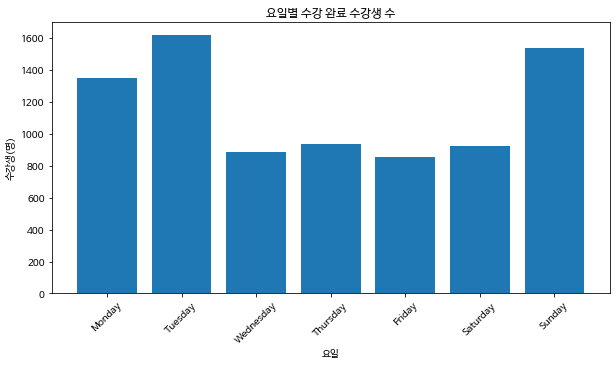

In [ ]:
#matplotlib 사용 선언하기
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #한글 깨짐을 방지
#요일 별 수강완료 수강생 수 라인 그래프 그리기
#그래프 사이즈
plt.figure(figsize=(10,5)) 
#그래프 x축 y축
plt.bar(weekdata.index, weekdata) 
#그래프 명
plt.title('요일별 수강 완료 수강생 수') 
#그래프 x축 레이블
plt.xlabel('요일')
#그래프 y축 레이블
plt.ylabel('수강생(명)') 
#x축 레이블을 90도로 변환
plt.xticks(rotation=45) 
#그래프 출력
plt.show()

# 새 섹션